In [5]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout#,LeakyReLU,PReLU,ThresholdedReLU,ELU
from keras.optimizers import SGD
import cPickle

import matplotlib.pyplot as plt

In [6]:
def unpickle(file):
    with open(file, 'rb') as fo:
        d = cPickle.load(fo)
    return d["data"],d["labels"]

temp=unpickle("cifar-10-batches-py/data_batch_1")
features=temp[0]
labels=temp[1]

for i in range(2,6):
    temp=unpickle("cifar-10-batches-py/data_batch_"+str(i))
    features=np.concatenate((features,temp[0]))
    labels=labels+temp[1]


testF,testL=unpickle("cifar-10-batches-py/test_batch")

print features.shape

(50000, 3072)


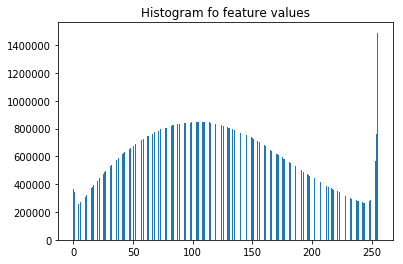

In [7]:
batch_size = len(features)
num_classes = len(set(labels))
epochs = 80

plt.hist(features.flatten(),bins="auto")  # arguments are passed to np.histogram
plt.title("Histogram fo feature values")
plt.show()

In [8]:
features = features.astype('float32')
testF = testF.astype('float32')
features /= 255
testF /= 255
labels = keras.utils.to_categorical(labels, num_classes)
testL = keras.utils.to_categorical(testL, num_classes)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy'])

history = model.fit(features, labels,
    batch_size=100,
    epochs=epochs,
    validation_data=(testF, testL))

score = model.evaluate(testF, testL, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 2,103,818
Trainable params: 2,103,818
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/80
50000/50000 [==============================] - 19s 386us/step - loss: 1.9588 - acc: 0.2970 - val_loss: 1.8504 - val_acc: 0.3393
Epoch 2/80
50000/50000 [==============================] - 19s 383us/step - 